## Boston Housing Data
This data set contains information regarding mortgage housing in Boston as per the the Federal Reserve Bank of Boston. Each entry has attributes seperated into columns. Each row represents a single household and the different attributes of their application

In [427]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/AvenashRamnarine/CSCI381/main/HDMA%20Boston%20Housing%20Data.csv')
#Drop first column because dataframe already gives us index values
df = df.iloc[: , 1:]

df

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


## EDA

The data set contains 2,381 entries and lists the attributes for each. The attributes given are: 
1. dir - debt payments to total income ratio

2. hir - housing expenses to income ratio

3. lvr - ratio of size of loan to assessed value of property

4. ccs - consumer credit score from 1 to 6 (a low value being a good score)

5. mcs - mortgage credit score from 1 to 4 (a low value being a good score)

6. pbcr - public bad credit record ?

7. dmi - denied mortgage insurance ?

8. self - self employed ?

9. single - is the applicant single ?

10. uria - 1989 Massachusetts unemployment rate in the applicant's industry

11. condominium - is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

12. black - is the applicant black ?

13. deny - mortgage application denied ?

Looking specifically at certain attributes of the data set we can begin to analyze different aspects of it.

For example, let's take a look at the debt payments to total income ratio using the dir attribute

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

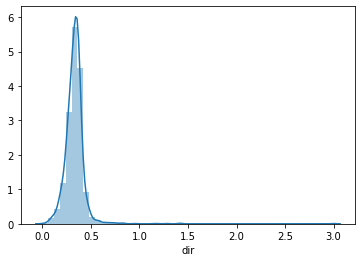

In [428]:
fig, ax = plt.subplots()
dp = sns.distplot(df['dir'], ax=ax)
dp.set_ylabel("", fontsize = 10)

We can see here that the majoirty of individuals in this data set land between the 0.0-0.5 ratio range. And within this range we can see that most people seem to be around the 0.25 range. This tells us that for the people within our data set, the majority of them are using about 1/4 of their total income towards debt payments

While we're analyzing this data, lets also take a look at the housing expenses to income ratio using the hir attribute

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


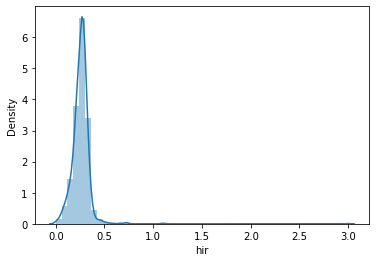

In [429]:
fig, ax = plt.subplots()
sns.distplot(df['hir'], ax=ax)

We see here again that the majority seem to be spending about 0.25 or 1/4 of their income on housing expenses. Which, when put together with the debt to income ratio, makes sense.

Next we should take a look at some other aspects of this data set. For example consumer credit scores and mortgage credit scores

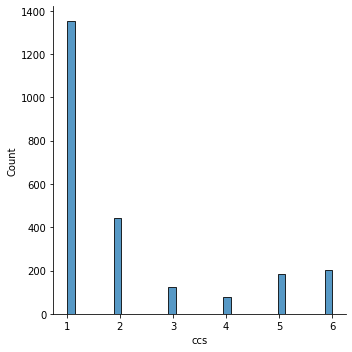

In [430]:
sns.displot(df['ccs'])

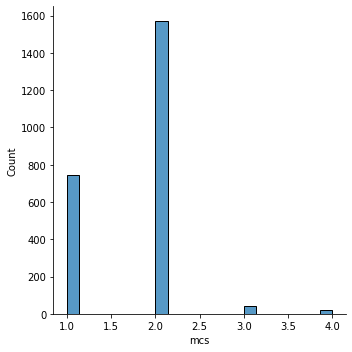

In [431]:
sns.displot(df['mcs'])

It's important to note that these values are scaled to a range where the lower the value, the better. The consumer credit score is scaled from 1-6 and the mortgage credit score is scaled from 1-4

However still we can see in the data that most of the people in our data set are in pretty good standing when it comes to credit scores

We can also try and look at relationships between 2 attribute. For example consumer credit score and housing expenses to income ratio.

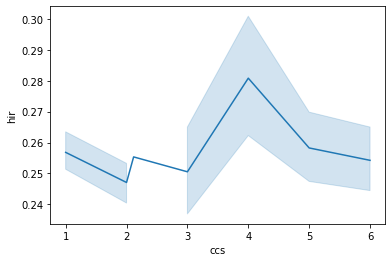

In [432]:
sns.lineplot(data=df['ccs'], x=df['ccs'], y=df['hir'])

This tells us that generally the more a person spends on their home expensese, the higher (and worse) their credit score is

Now that we've successfully made some analysis of the data, it's time we should look into cleaning and preparing the data.

## Data cleansing and preperation
The first thing we should do is scrape the data for any missing values.

In [433]:
print(df['dir'].isnull().sum())
print(df['hir'].isnull().sum())
print(df['lvr'].isnull().sum())
print(df['ccs'].isnull().sum())
print(df['mcs'].isnull().sum())
print(df['pbcr'].isnull().sum())
print(df['dmi'].isnull().sum())
print(df['self'].isnull().sum())
print(df['single'].isnull().sum())
print(df['uria'].isnull().sum())
print(df['comdominiom'].isnull().sum())
print(df['black'].isnull().sum())
print(df['deny'].isnull().sum())


0
0
0
0
0
1
0
1
0
0
0
0
0


Here we can see that we have 2 NaN values in 'pbcr' and 'self' respectively. Since the majority of answers within this data set for 'pbcr' and 'self' are 'no', it would be a reasonable assumption to set these values to 'no' as well. As the alternative setting them to 'yes' would most likely cause unforseen changes in the data set. And of course that is exactly what we are trying to get rid of when cleaning the data. 

In [434]:
df['pbcr'].fillna('no', inplace = True)
df['self'].fillna('no', inplace = True)

And just make sure we have successfuly cleansed the data, we will check again to make sure we filled all the null values.

In [435]:
print(df['pbcr'].isnull().sum())
print(df['self'].isnull().sum())

0
0


In [436]:
df

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


## Scaling Data
The next thing to do is to try and find values within the data that may need scaling. For example, we can see that the values of dir, hir, and lvr are all scaled from a 0.0-1.0 ratio. However looking at the other attributes such as ccs, mcs and uria, those ratios are in a whole number format (1.0 and up). So perhaps a reasonable assumption can be to increase those smaller ratios by a factor of * 10. This will ensure that they can be more adequately compared with the other attributes of the data set.

In [437]:
df['dir'] = df['dir'] * 10
df['hir'] = df['hir'] * 10
df['lvr'] = df['lvr'] * 10
df

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,2.210000,2.210000,8.000000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2.650000,2.650000,9.218750,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3.720000,2.480000,9.203980,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,3.200000,2.500000,8.604651,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,3.600000,3.500000,6.000000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,3.000000,3.000000,7.770492,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2.600000,2.000000,5.267606,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,3.200000,2.600000,7.538462,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,3.500000,2.600000,8.135593,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


Now we see that all number values are on the same scale and thus can be more easily compared.

## Linear Regression

Now that we finished that we can calculate the linear regression for each of our variables. However one thing to note is that some of the attributes that are not numerical (pbcr, dmi, self etc.) have to be dropped in order to compute the correct regression.

In [438]:
from sklearn.linear_model import LinearRegression

y = df['dir'].copy()
x = df.drop(['dir','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y)

print(r_sq)

0.6193655535826516


We can see here that for dir, the model explains about 61% of the data correctly.

Now we can repeat this calculation for every other numerical attribute to get their regression.

In [439]:
y = df['hir'].copy()
x = df.drop(['hir','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y)

print(r_sq)

0.6180433157560443


In [440]:
y = df['lvr'].copy()
x = df.drop(['lvr','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y) * 10

print(r_sq)

0.6270660233918335


In [441]:
y = df['ccs'].copy()
x = df.drop(['ccs','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y) * 10

print(r_sq)

0.4064248105184953


In [442]:
y = df['uria'].copy()
x = df.drop(['uria','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y) * 100

print(r_sq)

0.5922248220875392


In [443]:
y = df['mcs'].copy()
x = df.drop(['mcs','pbcr','dmi','self', 'single', 'comdominiom', 'black', 'deny'], axis=1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y) * 10

print(r_sq)

0.6683414198830284


## Re-Running EDA Analysis
Now that we have finished all our data preperation, feature  engineering, and data regression analysis, we can re run our EDA to see what changes occured

For example let's run our ccs vs hir comparison this time with the new scaled values

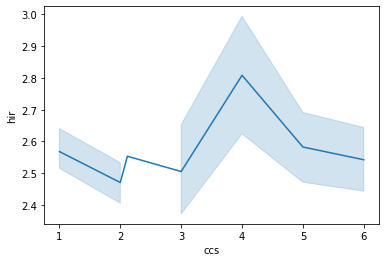

In [444]:
sns.lineplot(data=df['ccs'], x=df['ccs'], y=df['hir'])

You can see here that while the graph is similar, the value numbers are more aligned and make it easier to compare

Likewise we can observe this in other relations such as comparing hir and dir to spot outliers

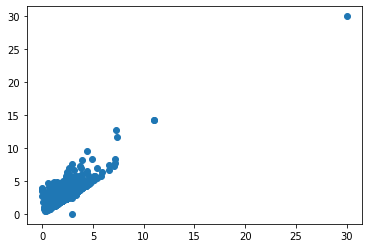

In [445]:
plt.scatter(df['hir'], df['dir'])

Or simply re-checking the values of things such as URIA and ccs

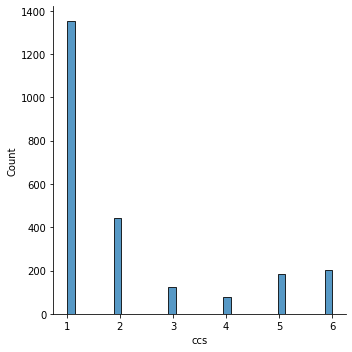

In [446]:
sns.displot(df['ccs'])

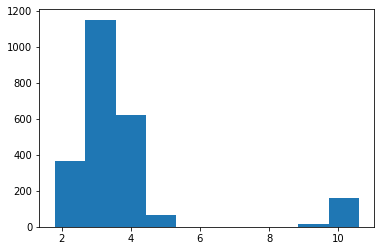

In [447]:
plt.hist(df['uria']);

All of this is to show that through our data scaling, preperation and regression we can clean up our data to overall be more organized 

## Conclusion
In conclusion you can see how analyzing the linear regression of your data can give you insight as to how accurate your data models are. Knowing this is a huge advantage when it comes to data analysis as the more accurate the data is, the more accurate the conclusions you draw from it are. And as data scientists, we must always present the most accurate data analysis as possible.

## Sources

https://stackoverflow.com/questions/52160719/is-it-possible-to-do-a-zoom-inset-using-seaborn
https://thispointer.com/pandas-delete-first-column-of-dataframe-in-python/
https://stackoverflow.com/questions/40389018/dropping-multiple-columns-from-a-data-frame-using-python
https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot